# Random Forest Classifier + GridSearchCV

This notebook uses Random Forest and performs Hyperparameter Tuning using GridSearchCV.

In [1]:
import utils
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load Data
X_train, y_train, X_test, y_test, class_names = utils.get_data_and_extract_features()

Loading features from cache...


=== GridSearchCV (Random Forest) ===
Starting Grid Search... this may take a while depending on your CPU.
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Grid Search complete in 138.26 seconds.
Best Parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Val Accuracy: 0.8363

=== Evaluation: Best Random Forest ===
Accuracy: 82.02%

Classification Report:
              precision    recall  f1-score   support

       Apple       0.81      0.70      0.75       435
      Banana       0.83      0.91      0.87       484
      Grapes       0.82      0.89      0.85       426
       Lemon       0.78      0.56      0.65       408
       Mango       0.77      0.62      0.69       346
      Orange       0.72      0.87      0.79       872
   Pineapple       0.86      0.86      0.86       373
 Pomegranate       0.86      0.89      0.87       787
  Strawberry       0.93      0.85      0.89       419
  Watermelon       0.91      0.87      0.89       

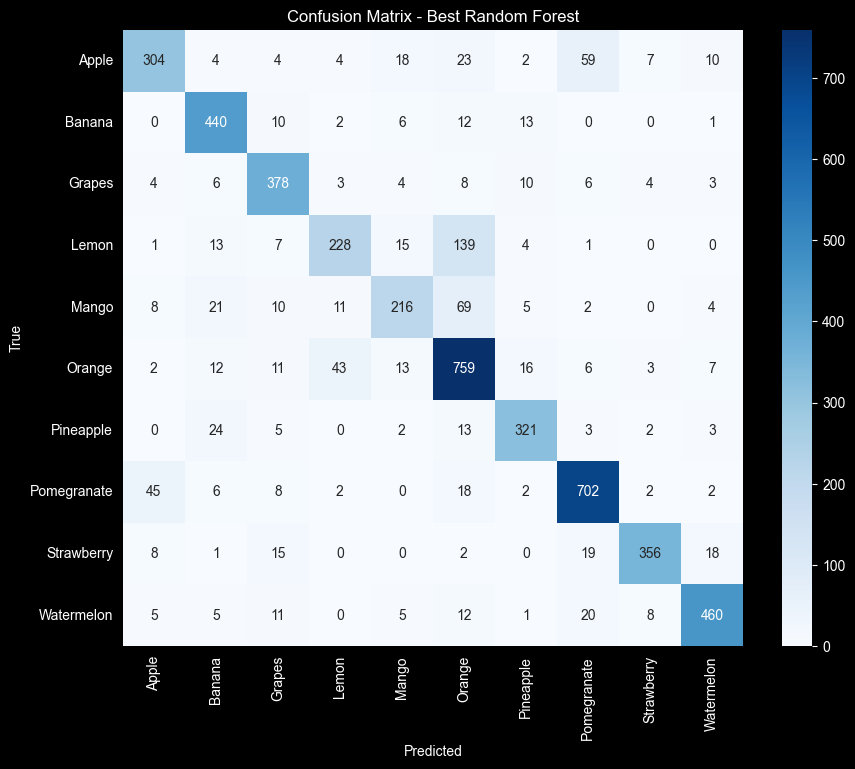

In [2]:
print("=== GridSearchCV (Random Forest) ===")
print("Starting Grid Search... this may take a while depending on your CPU.")

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

start_time = time.time()
grid_search.fit(X_train, y_train)
time_taken = time.time() - start_time

print(f"\nGrid Search complete in {time_taken:.2f} seconds.")
print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Cross-Val Accuracy: {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_
utils.evaluate_model(best_rf, X_test, y_test, class_names, model_name="Best Random Forest")


=== Error Analysis: 5 Misclassified Samples ===


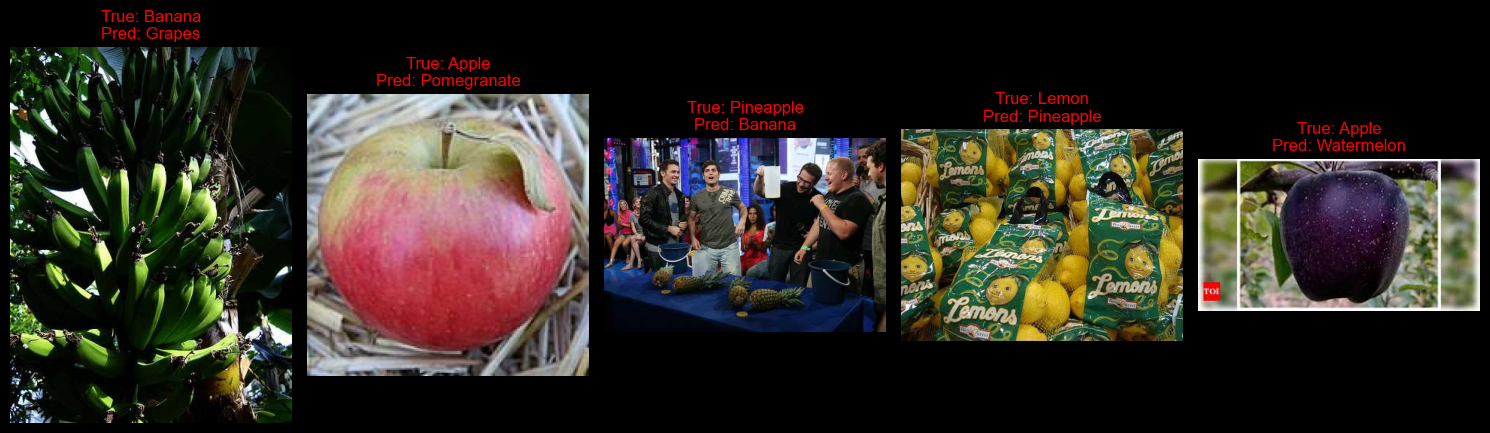

In [3]:
utils.visualize_model_errors(best_rf, X_test, y_test, class_names)

## Analysis & Insights

### Key Metrics
- **Accuracy**: 82.02%
- **Best Hyperparameters**: n_estimators=200, max_depth=None, min_samples_split=2
- **Cross-Validation Accuracy**: 83.63%
- **Macro Average F1-Score**: 0.81
- **Weighted Average F1-Score**: 0.82
- **Training Time**: 133.09 seconds for GridSearchCV

### Performance Analysis
- **Accuracy**: Medium (82.02%, within the 70-85% range)
- **Best Classes**:
  - Strawberry: 93% precision, 85% recall
  - Watermelon: 91% precision, 87% recall
  - Pomegranate: 86% precision, 89% recall
- **Worst Classes**:
  - Lemon: 78% precision, 56% recall (worst recall by far)
  - Mango: 77% precision, 62% recall
  - Orange: 72% precision, 87% recall (lowest precision)

### Error Analysis
- **Confusion Pairs**:
  - Lemon → Orange: 139 misclassifications (dominant error pattern)
  - Mango → Orange: 69 misclassifications
  - Apple → Pomegranate: 59 misclassifications
  - Pomegranate → Apple: 45 misclassifications
  - Orange → Lemon: 43 misclassifications (bidirectional with top error)
- **Visual Insights**: Random Forest shows a striking asymmetry in citrus confusion - Lemon is frequently misclassified as Orange (139 cases) but the reverse is much less common (43 cases). This suggests the ensemble learned to favor Orange predictions when uncertain about citrus fruits, possibly due to Orange having more training samples (872 vs 408). The Mango → Orange confusion (69 cases) further supports this bias. The model performs well on fruits with distinctive features (Strawberry, Watermelon) but struggles with the yellow-orange color spectrum.

### Conclusion
Random Forest achieves solid 82.02% accuracy, demonstrating the power of ensemble methods over single Decision Trees (59.96%). The GridSearchCV optimization found that unlimited tree depth with 200 estimators works best, allowing the ensemble to capture complex patterns while avoiding overfitting through averaging. However, the model exhibits a clear bias toward predicting Orange for ambiguous citrus samples, resulting in Lemon having only 56% recall - the worst among all classes. This performance is typical for Random Forests on image features, showing good generalization but class imbalance sensitivity. The 182 total Lemon-Orange confusions represent the primary weakness and suggest the need for class balancing or cost-sensitive learning to improve citrus discrimination.
